# 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기

## 분석 목표
1. 가장 인기 있는 메뉴는 무엇일까?
2. 메뉴별 판매량은 얼마나 될까?
3. 메뉴별 가격대는 얼마일까?

## 학습 함수
1. tolist(): array를 list로 변환시켜주는 함수
2. arange: numpy에서의 range라 생각하면됨. + range와는 다르게 실수 단위로도 표현 가능함.
3. value_counts: 각 종류별로 컬럼에 몇 개의 데이터가 있는지 세어줌.
4. unique: 해당 컬럼에 어떤 종류의 데이터가 있는지 알려줌.
5. apply: lambda or 함수 적용 가능, python의 map과 유사, 특정 열과 행에 함수를 적용해주는 역할

## [step1] 탐색: 데이터의 기초 정보 살펴보기 

In [13]:
import pandas as pd

file_path = "~/Desktop/data/chipotle.tsv"  # TSV는 Tab Separated Value file

In [15]:
chipo = pd.read_csv(file_path, sep='\t')

In [17]:
print(chipo.shape)
print('#' * 50)
print(chipo.info())

(4622, 5)
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [18]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [20]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

- order_id: 주문 번호
- quantity: 아이템의 주문 수량
- item_name: 주문한 아이템의 이름
- choice_description: 주문한 아이템의 상세 선택 옵션
- item_price: 가격

- quantity와 item_price의 수치적 특징
-> 두 피처는 **연속형 피처**이다.
-> 연속형 피처란 어떠한 값도 가질 수 있는 연속적인 숫자 형태를 의미.

In [22]:
print(len(chipo['order_id'].unique())) # order_id의 개수를 출력
print(len(chipo['item_name'].unique())) # item_name의 개수를 출력

1834
50


## [step2] 인사이트 발견: 탐색과 시각화하기

In [24]:
# 가장 많이 주문한 아이템 top 10을 출력
item_count = chipo['item_name'].value_counts()[:10]

for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print('top', idx, ":", val, cnt)

top 1 : Chicken Bowl 726
top 2 : Chicken Burrito 553
top 3 : Chips and Guacamole 479
top 4 : Steak Burrito 368
top 5 : Canned Soft Drink 301
top 6 : Chips 211
top 7 : Steak Bowl 211
top 8 : Bottled Water 162
top 9 : Chicken Soft Tacos 115
top 10 : Chips and Fresh Tomato Salsa 110


In [25]:
# 아이템별 주문 개수와 총량 구하기
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [26]:
# 아이템별 주문 총량을 계산
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]  # 아이템별 주문 총량을 출력

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

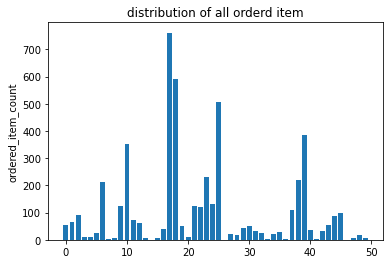

In [28]:
# 시각화
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('distribution of all orderd item')

plt.show()

## [step3] 데이터 전처리: 전처리 함수 사용하기

In [30]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [32]:
# apply 함수로 전처리
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


## [step4] 탐색적 분석: 스무고개로 개념적 탐색 분석하기

In [35]:
# 주문당 평균 계산금액을 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.81142857142869

In [38]:
# 한 주문에 10달러 이상 지불한 id를 출력
chipo_orderid_group = chipo.groupby('order_id').sum()
result = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(result[:10])
print(result.index.values)

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70
6                2       17.50
7                2       15.70
8                2       10.88
9                3       10.67
10               2       13.20
[   1    2    3 ... 1832 1833 1834]


In [39]:
# 각 아이템의 가격을 계산
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by='item_price', ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


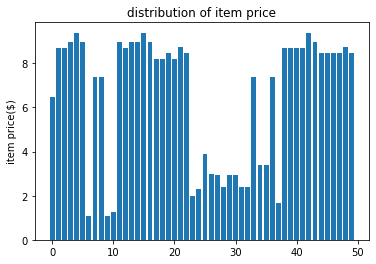

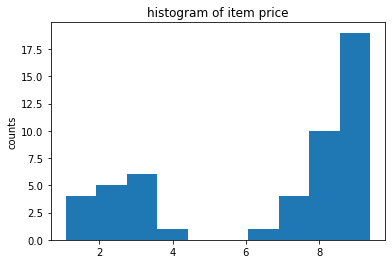

In [43]:
# 아이템 가격 분포 그래프를 출력
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('distribution of item price')
plt.show()

# 아이템 가격 히스토그램을 출력
plt.hist(item_price)
plt.ylabel('counts')
plt.title('histogram of item price')
plt.show()

In [44]:
# 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [45]:
# veggie salad bowl이 몇 번 주문되었는지 계산
chipo_salad = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
# 한 주문 내에서 중복 집계된 item_name을 제거
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))

chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
